# 一、数据清洗

## 1、理解数据

In [3]:
#查看头部数据
df.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [4]:
#查看行数、列数
df.shape

(800000, 47)

In [5]:
#查看字段名
df.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [38]:
#df.isnull().sum()
#df.loc[:,'n0':'n14']

In [122]:
#缺失值占比函数
def missing_value_table(df):
    #计算所有的缺失值
    mis_val = df.isnull().sum()
    # %比
    mis_val_percent = 100*df.isnull().sum()/len(df)
    #合并
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_rename = mis_val_table.rename(columns = {0:'Missing values',1:'% of total values'})
    #剔除完整的并排序
    mis_val_rename = mis_val_rename[mis_val_rename.iloc[:,1]!=0].sort_values('% of total values',ascending=False)
    return mis_val_rename

In [123]:
missing_value_table(df)

,Missing values,% of total values
n11,69752,8.719000
employmentLength,46799,5.849875
n8,40271,5.033875
n14,40270,5.033750
n13,40270,5.033750
n12,40270,5.033750
n9,40270,5.033750
n0,40270,5.033750
n1,40270,5.033750
n2,40270,5.033750


In [50]:
#pd.concat([df.loc[1],df.dtypes],axis=1)

In [7]:
#查看数据类型分布
df.dtypes.value_counts()

float64    33
int64       9
object      5
dtype: int64

In [57]:
#查看object类型数据类型数
df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

grade                  7
subGrade              35
employmentLength      11
issueDate            139
earliesCreditLine    720
dtype: int64

## 2、数据预处理

### 2.1、根据字段含义逐个查看处理各字段

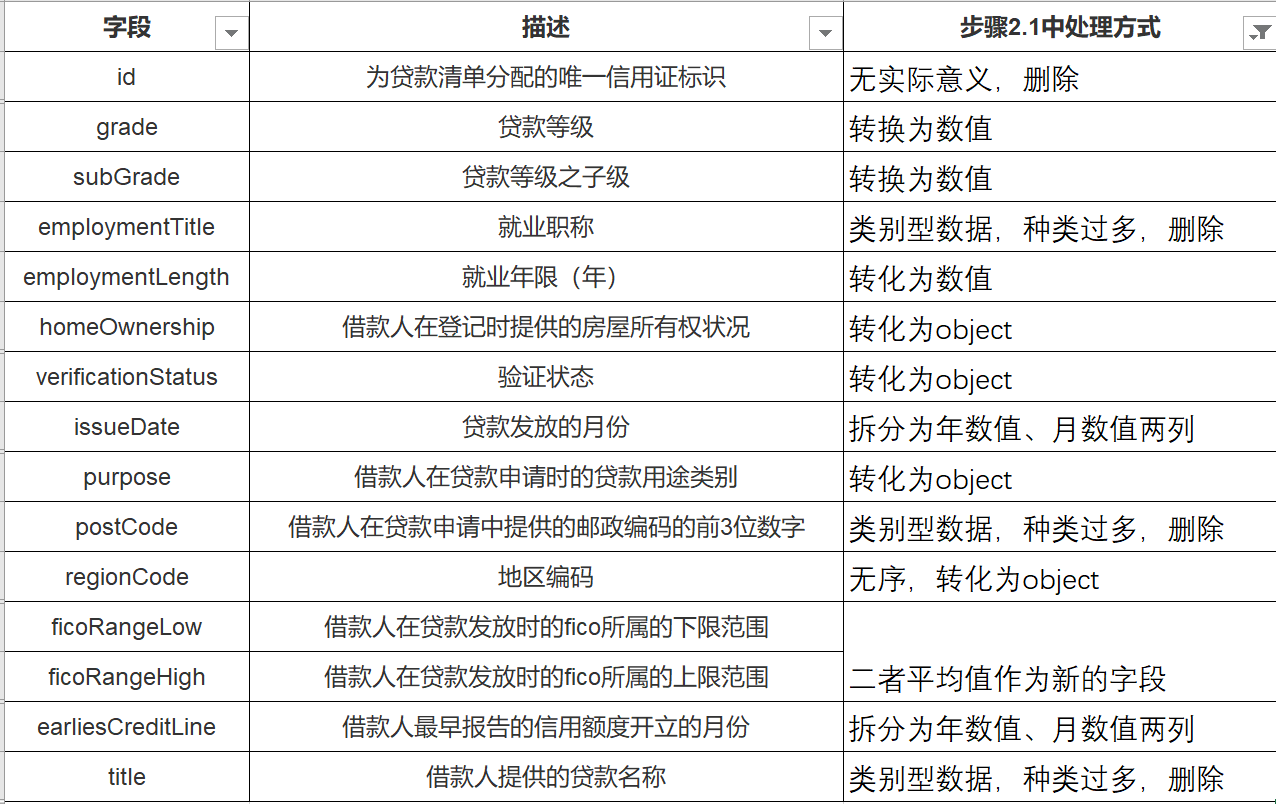

In [124]:
#删除'id','employmentTitle','postCode','title'字段
df=df.drop(['id','employmentTitle','postCode','title'],axis=1)

In [125]:
#‘贷款等级’是有高低顺序的，转化为数值格式
df['grade']=df['grade'].replace(['A','B','C','D','E','F','G'],[1,2,3,4,5,6,7])

In [126]:
#‘贷款等级之子级’中的字母表示的信息在‘贷款等级’字段已经有了，将其删除。然后将剩下的数字转化为数值格式
import re
regex_pat = re.compile(r'[A-Z]', flags=re.IGNORECASE)
df['subGrade']=df['subGrade'].str.replace(regex_pat,'',regex=True).astype('int64')

In [127]:
#'就业年限（年）'是有大小之分的，将其转化为数值，并做缺失值填充处理
df['employmentLength']=df['employmentLength'].str.replace(' years','').str.replace(' year','').str.replace('+','').replace('< 1',0)
df['employmentLength']=df['employmentLength'].fillna(method='ffill').astype('int64')

In [131]:
#‘借款人在登记时提供的房屋所有权状况’、‘验证状态’、‘借款人在贷款申请时的贷款用途类别’、‘地区编码’是没有大小之分的，转化为object格式
df['homeOwnership']=df['homeOwnership'].astype('object')
df['verificationStatus']=df['verificationStatus'].astype('object')
df['purpose']=df['purpose'].astype('object')
df['regionCode']=df['regionCode'].astype('object')

In [132]:
#'贷款发放的月份'字段转化为时间格式之后可以发现其日全部为1,为多余信息,直接去除，年份信息、月份信息作为新的两个字段
pd.to_datetime(df['issueDate']).dt.day.value_counts()
df['issueYear']=pd.to_datetime(df['issueDate']).dt.year
df['issueMonth']=pd.to_datetime(df['issueDate']).dt.month
del df['issueDate']

In [134]:
#添加earliesCreditLine_Month，earliesCreditLine_Year两字段，删除earliesCreditLine字段
df['earliesCreditLine_Month']=df['earliesCreditLine'].str.split('-',expand=True)[0].replace(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
df['earliesCreditLine_Year']=df['earliesCreditLine'].str.split('-',expand=True)[1].astype('int64')
del df['earliesCreditLine']

### 2.2、独热编码

In [139]:
#查看2.1所有步骤处理完之后各字段类型分布
df.dtypes.value_counts()

float64    30
int64      11
object      4
dtype: int64

In [142]:
df=pd.get_dummies(df)

In [143]:
df.dtypes.value_counts()

uint8      74
float64    30
int64      11
dtype: int64

### 2.3、拆分、缺失值填充、标准化

In [182]:
#拆分训练集、验证集
from sklearn.model_selection import train_test_split
y = df['isDefault']
X = df.drop(columns = ['isDefault'])
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.2,random_state = 0)

In [185]:
#缺失值填充
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [187]:
#标准化处理
from sklearn.preprocessing import RobustScaler
Rs=RobustScaler()
Rs.fit(X_train)
X_train = Rs.transform(X_train)
X_test = Rs.transform(X_test)

## 3、模型

In [189]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.0001)

In [190]:
predictions = log_reg.predict_proba(X_test)[:,1]

In [192]:
from sklearn.metrics import roc_auc_score
test_auc = roc_auc_score(y_test,predictions)
test_auc

0.7137747510127621

In [194]:
import lightgbm as lgb
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

model.fit(X_train, y_train, eval_metric = 'auc',
          eval_set = [(X_test, y_test), (X_train, y_train)],
          eval_names = ['test', 'train'],
          early_stopping_rounds = 100, verbose = 200)

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.737739	train's binary_logloss: 0.600648	test's auc: 0.732022	test's binary_logloss: 0.604535
[400]	train's auc: 0.746256	train's binary_logloss: 0.593553	test's auc: 0.733472	test's binary_logloss: 0.601409
[600]	train's auc: 0.753386	train's binary_logloss: 0.587635	test's auc: 0.733795	test's binary_logloss: 0.599339
[800]	train's auc: 0.759783	train's binary_logloss: 0.582304	test's auc: 0.734148	test's binary_logloss: 0.597454
[1000]	train's auc: 0.765991	train's binary_logloss: 0.577124	test's auc: 0.734322	test's binary_logloss: 0.595715
Early stopping, best iteration is:
[953]	train's auc: 0.764614	train's binary_logloss: 0.578278	test's auc: 0.734386	test's binary_logloss: 0.596062


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [196]:
predictions2 = model.predict_proba(X_test)[:,1]

In [197]:
test_auc2 = roc_auc_score(y_test,predictions2)
test_auc2

0.7343861460496339

## 4、保存模型

In [216]:
def preprocess(df):
    #删除'id','employmentTitle','postCode','title'字段
    df=df.drop(['id','employmentTitle','postCode','title'],axis=1)
    #‘贷款等级’是有高低顺序的，转化为数值格式
    df['grade']=df['grade'].replace(['A','B','C','D','E','F','G'],[1,2,3,4,5,6,7])
    #‘贷款等级之子级’中的字母表示的信息在‘贷款等级’字段已经有了，将其删除。然后将剩下的数字转化为数值格式
    regex_pat = re.compile(r'[A-Z]', flags=re.IGNORECASE)
    df['subGrade']=df['subGrade'].str.replace(regex_pat,'',regex=True).astype('int64')
    #'就业年限（年）'是有大小之分的，将其转化为数值，并做缺失值填充处理
    df['employmentLength']=df['employmentLength'].str.replace(' years','').str.replace(' year','').str.replace('+','').replace('< 1',0)
    df['employmentLength']=df['employmentLength'].fillna(method='ffill').astype('int64')
    #‘借款人在登记时提供的房屋所有权状况’、‘验证状态’、‘借款人在贷款申请时的贷款用途类别’、‘地区编码’是没有大小之分的，转化为object格式
    df['homeOwnership']=df['homeOwnership'].astype('object')
    df['verificationStatus']=df['verificationStatus'].astype('object')
    df['purpose']=df['purpose'].astype('object')
    df['regionCode']=df['regionCode'].astype('object')
    #'贷款发放的月份'字段转化为时间格式之后可以发现其日全部为1,为多余信息,直接去除，年份信息、月份信息作为新的两个字段
    pd.to_datetime(df['issueDate']).dt.day.value_counts()
    df['issueYear']=pd.to_datetime(df['issueDate']).dt.year
    df['issueMonth']=pd.to_datetime(df['issueDate']).dt.month
    del df['issueDate']
    #添加earliesCreditLine_Month，earliesCreditLine_Year两字段，删除earliesCreditLine字段
    df['earliesCreditLine_Month']=df['earliesCreditLine'].str.split('-',expand=True)[0].replace(
        ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])
    df['earliesCreditLine_Year']=df['earliesCreditLine'].str.split('-',expand=True)[1].astype('int64')
    del df['earliesCreditLine']
    df=pd.get_dummies(df)
    return df

In [218]:
testA=pd.read_csv('testA.csv')
XA=preprocess(testA)
XA = imp.transform(XA)
XA = Rs.transform(XA)
predictions3 = model.predict_proba(XA)[:,1]
submit=pd.read_csv('testA.csv')
submit['isDefault'] = predictions3
submit.to_csv('prediction.csv', index=False)